# Bài tập thực hành 2: Phân loại Nấm (Mushroom Classification) với Naïve Bayes

## Giới thiệu bài toán

**Mục tiêu:** Xây dựng mô hình Naïve Bayes để phân loại nấm là **ăn được (edible)** hay **độc (poisonous)**.

**Tập dữ liệu:** Mushroom Classification Dataset
- Dữ liệu gồm **8124 mẫu** nấm với **22 đặc trưng** mô tả các thuộc tính vật lý
- **Biến mục tiêu (class)**:
  - `e` = edible (ăn được) 
  - `p` = poisonous (độc)
- **Các đặc trưng**: Tất cả đều là dữ liệu phân loại (categorical) được mã hóa bằng chữ cái

**Ý nghĩa thực tế:** Đây là bài toán quan trọng trong y học và an toàn thực phẩm - một dự đoán sai có thể gây nguy hiểm đến tính mạng!

**Phương pháp:** Sử dụng thuật toán Naïve Bayes sau khi mã hóa dữ liệu categorical.

## 1. Import các thư viện cần thiết

In [1]:
# Import thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Import thư viện tiền xử lý và mô hình từ scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# Import thư viện đánh giá mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

# Cài đặt để hiển thị đầy đủ columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Đã import tất cả thư viện thành công!")

✅ Đã import tất cả thư viện thành công!


## 2. Đọc và khám phá dữ liệu

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data/mushrooms.csv')

print("📊 Kích thước dữ liệu:", df.shape)
print(f"   - Số lượng mẫu (rows): {df.shape[0]}")
print(f"   - Số lượng đặc trưng (columns): {df.shape[1]}")
print("\n5 dòng đầu tiên của dữ liệu:")
df.head()

📊 Kích thước dữ liệu: (8124, 23)
   - Số lượng mẫu (rows): 8124
   - Số lượng đặc trưng (columns): 23

5 dòng đầu tiên của dữ liệu:


class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
0     p         x           s         n       t    p               f            c         n          k           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
1     e         x           s         y       t    a               f            c         b          k           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       g
2     e         b           s         w       t    l               f            c         b          n           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       m
3     p         x           y         w       t    p               f            c         n          n           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
4     e         x           s         g       f    n               f            w         b          k           t          e                        s                        s                      w                      w         p          w           o         e                 n          a       g

In [3]:
# Xem thông tin tổng quan về dữ liệu
print("📋 Thông tin chi tiết về dataset:")
df.info()

📋 Thông tin chi tiết về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   obj

In [4]:
# Thống kê mô tả (đối với dữ liệu categorical)
print("📈 Thống kê mô tả:")
df.describe(include='all')

📈 Thống kê mô tả:


class cap-shape cap-surface cap-color bruises  odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
count   8124      8124        8124      8124    8124  8124            8124         8124      8124       8124        8124       8124                     8124                     8124                   8124                   8124      8124       8124        8124      8124              8124       8124    8124
unique     2         6           4        10       2     9               2            2         2         12           2          5                        4                        4                      9                      9         1          4           3         5                 9          6       7
top        e         x           y         n       f     n               f            c         b          b           t          b                        s                        s                      w                      w         p          w           o         p                 w          v       d
freq    4208      3656        3244      2284    4748  3528            7914         6812      5612       1728        4608       3776                     5176                     4936                   4464                   4384      8124       7924        7488      3968              2388       4040    3148

In [5]:
# Liệt kê tất cả các cột
print("📝 Danh sách tất cả các cột (đặc trưng):")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:<30} - Số giá trị unique: {df[col].nunique()}")
print("=" * 80)

📝 Danh sách tất cả các cột (đặc trưng):
 1. class                          - Số giá trị unique: 2
 2. cap-shape                      - Số giá trị unique: 6
 3. cap-surface                    - Số giá trị unique: 4
 4. cap-color                      - Số giá trị unique: 10
 5. bruises                        - Số giá trị unique: 2
 6. odor                           - Số giá trị unique: 9
 7. gill-attachment                - Số giá trị unique: 2
 8. gill-spacing                   - Số giá trị unique: 2
 9. gill-size                      - Số giá trị unique: 2
10. gill-color                     - Số giá trị unique: 12
11. stalk-shape                    - Số giá trị unique: 2
12. stalk-root                     - Số giá trị unique: 5
13. stalk-surface-above-ring       - Số giá trị unique: 4
14. stalk-surface-below-ring       - Số giá trị unique: 4
15. stalk-color-above-ring         - Số giá trị unique: 9
16. stalk-color-below-ring         - Số giá trị unique: 9
17. veil-type                 

In [6]:
# Kiểm tra giá trị thiếu
print("🔍 Kiểm tra giá trị thiếu:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ Không có giá trị thiếu trong dữ liệu!")
else:
    print(missing_values[missing_values > 0])

🔍 Kiểm tra giá trị thiếu:
✅ Không có giá trị thiếu trong dữ liệu!

✅ Không có giá trị thiếu trong dữ liệu!


🎯 Phân phối biến mục tiêu (class):
class
e    4208
p    3916
Name: count, dtype: int64

Tỷ lệ phần trăm:
   - Edible (e - ăn được):    51.80%
   - Poisonous (p - độc):     48.20%


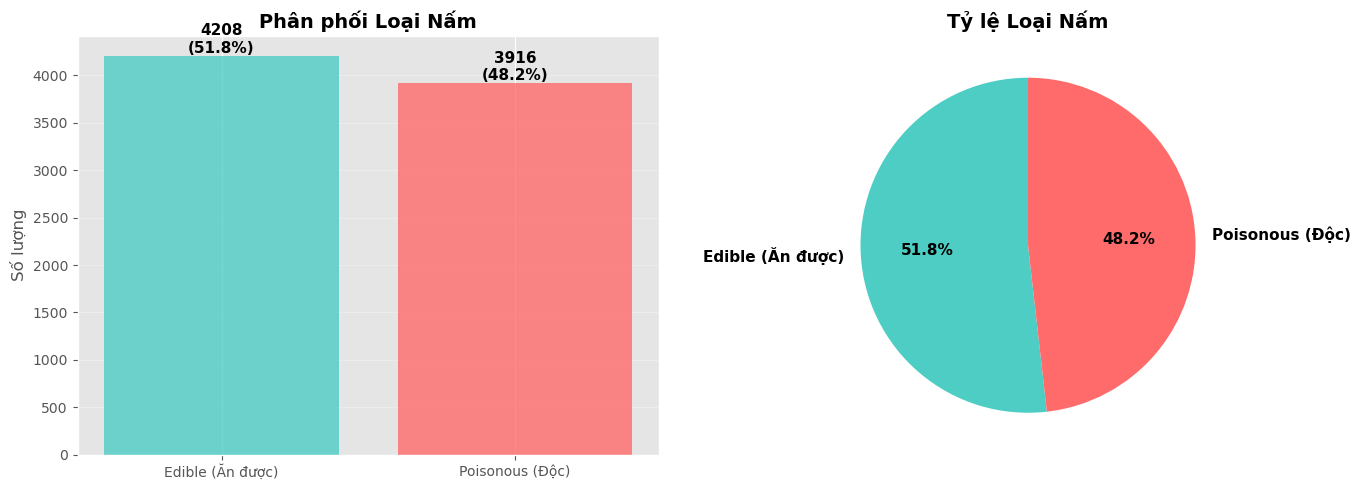

In [7]:
# Kiểm tra phân phối của biến mục tiêu (class)
print("🎯 Phân phối biến mục tiêu (class):")
print("=" * 60)
print(df['class'].value_counts())
print("\nTỷ lệ phần trăm:")
class_dist = df['class'].value_counts(normalize=True) * 100
print(f"   - Edible (e - ăn được):    {class_dist['e']:.2f}%")
print(f"   - Poisonous (p - độc):     {class_dist['p']:.2f}%")
print("=" * 60)

# Vẽ biểu đồ phân phối
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
class_counts = df['class'].value_counts()
colors = ['#4ECDC4', '#FF6B6B']
bars = axes[0].bar(['Edible (Ăn được)', 'Poisonous (Độc)'], class_counts.values, color=colors, alpha=0.8)
axes[0].set_title('Phân phối Loại Nấm', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Thêm giá trị lên đầu cột
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Biểu đồ tròn
axes[1].pie(class_counts.values, labels=['Edible (Ăn được)', 'Poisonous (Độc)'], 
           autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Tỷ lệ Loại Nấm', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
# Xem một vài giá trị unique của các cột để hiểu dữ liệu
print("🔤 Một số giá trị unique của các đặc trưng:")
print("=" * 80)
sample_cols = ['cap-shape', 'cap-color', 'odor', 'gill-color', 'stalk-shape']
for col in sample_cols:
    print(f"\n{col}:")
    print(f"   Các giá trị: {sorted(df[col].unique())}")
    print(f"   Số lượng unique: {df[col].nunique()}")
print("=" * 80)

🔤 Một số giá trị unique của các đặc trưng:

cap-shape:
   Các giá trị: ['b', 'c', 'f', 'k', 's', 'x']
   Số lượng unique: 6

cap-color:
   Các giá trị: ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
   Số lượng unique: 10

odor:
   Các giá trị: ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
   Số lượng unique: 9

gill-color:
   Các giá trị: ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
   Số lượng unique: 12

stalk-shape:
   Các giá trị: ['e', 't']
   Số lượng unique: 2


## 3. Tiền xử lý dữ liệu

### 3.1. Mã hóa dữ liệu bằng LabelEncoder

Vì tất cả các cột đều là dữ liệu phân loại (categorical) được biểu diễn bằng chữ cái, ta cần mã hóa chúng thành số để mô hình có thể xử lý.

In [9]:
# Tạo bản sao để xử lý
data = df.copy()

print("🔄 Bắt đầu mã hóa dữ liệu...")
print("=" * 80)

# Tạo dictionary để lưu các LabelEncoder (để có thể decode sau này nếu cần)
label_encoders = {}

# Mã hóa tất cả các cột
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
    # Hiển thị mapping cho một số cột quan trọng
    if column in ['class', 'cap-shape', 'odor']:
        print(f"\n{column}:")
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        for original, encoded in mapping.items():
            print(f"   {original} -> {encoded}")

print("\n" + "=" * 80)
print("✅ Đã mã hóa tất cả các cột thành công!")

print("\nDữ liệu sau khi mã hóa:")
data.head()

🔄 Bắt đầu mã hóa dữ liệu...

class:
   e -> 0
   p -> 1

cap-shape:
   b -> 0
   c -> 1
   f -> 2
   k -> 3
   s -> 4
   x -> 5

odor:
   a -> 0
   c -> 1
   f -> 2
   l -> 3
   m -> 4
   n -> 5
   p -> 6
   s -> 7
   y -> 8

✅ Đã mã hóa tất cả các cột thành công!

Dữ liệu sau khi mã hóa:


class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
0      1          5            2          4        1     6                1             0          1           4            0           3                         2                         2                       7                       7          0           2            1          4                  2           3        5
1      0          5            2          9        1     0                1             0          0           4            0           2                         2                         2                       7                       7          0           2            1          4                  3           2        1
2      0          0            2          8        1     3                1             0          0           5            0           2                         2                         2                       7                       7          0           2            1          4                  3           2        3
3      1          5            3          8        1     6                1             0          1           5            0           3                         2                         2                       7                       7          0           2            1          4                  2           3        5
4      0          5            2          3        0     5                1             1          0           4            1           3                         2                         2                       7                       7          0           2            1          0                  3           0        1

In [10]:
# Kiểm tra kiểu dữ liệu sau khi mã hóa
print("📊 Kiểu dữ liệu sau khi mã hóa:")
print(data.dtypes.value_counts())
print("\n✅ Tất cả đều là số nguyên (integer) - phù hợp cho Naïve Bayes!")

📊 Kiểu dữ liệu sau khi mã hóa:
int64    23
Name: count, dtype: int64

✅ Tất cả đều là số nguyên (integer) - phù hợp cho Naïve Bayes!


### 3.2. Tách Features và Target, chia dữ liệu Train/Test

In [11]:
# Tách features (X) và target (y)
X = data.drop('class', axis=1)  # Tất cả các đặc trưng trừ 'class'
y = data['class']                # Biến mục tiêu

print("📊 Kích thước dữ liệu:")
print(f"   X (Features): {X.shape} - {X.shape[1]} đặc trưng")
print(f"   y (Target): {y.shape}")
print(f"\nCác đặc trưng: {list(X.columns)}")

📊 Kích thước dữ liệu:
   X (Features): (8124, 22) - 22 đặc trưng
   y (Target): (8124,)

Các đặc trưng: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [12]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm thử (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Đã chia dữ liệu:")
print("=" * 60)
print(f"Tập huấn luyện (Train):")
print(f"   - X_train: {X_train.shape[0]} mẫu")
print(f"   - y_train: {y_train.shape[0]} mẫu")
print(f"   - Tỷ lệ: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"\nTập kiểm thử (Test):")
print(f"   - X_test: {X_test.shape[0]} mẫu")
print(f"   - y_test: {y_test.shape[0]} mẫu")
print(f"   - Tỷ lệ: {X_test.shape[0]/len(X)*100:.1f}%")
print("=" * 60)

# Kiểm tra phân phối trong tập train và test
print("\n📊 Phân phối class trong các tập:")
print("\nTập huấn luyện:")
print(y_train.value_counts())
print("\nTập kiểm thử:")
print(y_test.value_counts())

✅ Đã chia dữ liệu:
Tập huấn luyện (Train):
   - X_train: 6499 mẫu
   - y_train: 6499 mẫu
   - Tỷ lệ: 80.0%

Tập kiểm thử (Test):
   - X_test: 1625 mẫu
   - y_test: 1625 mẫu
   - Tỷ lệ: 20.0%

📊 Phân phối class trong các tập:

Tập huấn luyện:
class
0    3366
1    3133
Name: count, dtype: int64

Tập kiểm thử:
class
0    842
1    783
Name: count, dtype: int64


## 4. Xây dựng và huấn luyện mô hình Naïve Bayes

Ta sẽ thử nghiệm với nhiều loại Naïve Bayes để so sánh:
- **MultinomialNB**: Phù hợp với dữ liệu đếm và categorical đã được mã hóa
- **GaussianNB**: Giả định phân phối Gaussian
- **BernoulliNB**: Phù hợp với dữ liệu nhị phân

### 4.1. MultinomialNB (Phù hợp nhất với dữ liệu categorical)

In [13]:
# Khởi tạo và huấn luyện mô hình MultinomialNB
print("🤖 Mô hình 1: Multinomial Naïve Bayes")
print("=" * 60)

model_multinomial = MultinomialNB()
model_multinomial.fit(X_train, y_train)

# Dự đoán
y_pred_multi = model_multinomial.predict(X_test)

# Đánh giá
acc_multi = accuracy_score(y_test, y_pred_multi)
prec_multi = precision_score(y_test, y_pred_multi)
rec_multi = recall_score(y_test, y_pred_multi)
f1_multi = f1_score(y_test, y_pred_multi)

print(f"✅ Đã huấn luyện thành công!")
print(f"\nKết quả trên tập test:")
print(f"   - Accuracy:  {acc_multi:.4f} ({acc_multi*100:.2f}%)")
print(f"   - Precision: {prec_multi:.4f} ({prec_multi*100:.2f}%)")
print(f"   - Recall:    {rec_multi:.4f} ({rec_multi*100:.2f}%)")
print(f"   - F1-Score:  {f1_multi:.4f} ({f1_multi*100:.2f}%)")
print("=" * 60)

🤖 Mô hình 1: Multinomial Naïve Bayes
✅ Đã huấn luyện thành công!

Kết quả trên tập test:
   - Accuracy:  0.8129 (81.29%)
   - Precision: 0.9025 (90.25%)
   - Recall:    0.6858 (68.58%)
   - F1-Score:  0.7794 (77.94%)
✅ Đã huấn luyện thành công!

Kết quả trên tập test:
   - Accuracy:  0.8129 (81.29%)
   - Precision: 0.9025 (90.25%)
   - Recall:    0.6858 (68.58%)
   - F1-Score:  0.7794 (77.94%)


### 4.2. GaussianNB

In [14]:
# Khởi tạo và huấn luyện mô hình GaussianNB
print("🤖 Mô hình 2: Gaussian Naïve Bayes")
print("=" * 60)

model_gaussian = GaussianNB()
model_gaussian.fit(X_train, y_train)

# Dự đoán
y_pred_gauss = model_gaussian.predict(X_test)

# Đánh giá
acc_gauss = accuracy_score(y_test, y_pred_gauss)
prec_gauss = precision_score(y_test, y_pred_gauss)
rec_gauss = recall_score(y_test, y_pred_gauss)
f1_gauss = f1_score(y_test, y_pred_gauss)

print(f"✅ Đã huấn luyện thành công!")
print(f"\nKết quả trên tập test:")
print(f"   - Accuracy:  {acc_gauss:.4f} ({acc_gauss*100:.2f}%)")
print(f"   - Precision: {prec_gauss:.4f} ({prec_gauss*100:.2f}%)")
print(f"   - Recall:    {rec_gauss:.4f} ({rec_gauss*100:.2f}%)")
print(f"   - F1-Score:  {f1_gauss:.4f} ({f1_gauss*100:.2f}%)")
print("=" * 60)

🤖 Mô hình 2: Gaussian Naïve Bayes
✅ Đã huấn luyện thành công!

Kết quả trên tập test:
   - Accuracy:  0.9286 (92.86%)
   - Precision: 0.9195 (91.95%)
   - Recall:    0.9336 (93.36%)
   - F1-Score:  0.9265 (92.65%)


### 4.3. BernoulliNB

In [15]:
# Khởi tạo và huấn luyện mô hình BernoulliNB
print("🤖 Mô hình 3: Bernoulli Naïve Bayes")
print("=" * 60)

model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train, y_train)

# Dự đoán
y_pred_bern = model_bernoulli.predict(X_test)

# Đánh giá
acc_bern = accuracy_score(y_test, y_pred_bern)
prec_bern = precision_score(y_test, y_pred_bern)
rec_bern = recall_score(y_test, y_pred_bern)
f1_bern = f1_score(y_test, y_pred_bern)

print(f"✅ Đã huấn luyện thành công!")
print(f"\nKết quả trên tập test:")
print(f"   - Accuracy:  {acc_bern:.4f} ({acc_bern*100:.2f}%)")
print(f"   - Precision: {prec_bern:.4f} ({prec_bern*100:.2f}%)")
print(f"   - Recall:    {rec_bern:.4f} ({rec_bern*100:.2f}%)")
print(f"   - F1-Score:  {f1_bern:.4f} ({f1_bern*100:.2f}%)")
print("=" * 60)

🤖 Mô hình 3: Bernoulli Naïve Bayes
✅ Đã huấn luyện thành công!

Kết quả trên tập test:
   - Accuracy:  0.8535 (85.35%)
   - Precision: 0.9291 (92.91%)
   - Recall:    0.7535 (75.35%)
   - F1-Score:  0.8322 (83.22%)


## 5. So sánh các mô hình

In [16]:
# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    'Mô hình': ['MultinomialNB', 'GaussianNB', 'BernoulliNB'],
    'Accuracy': [acc_multi, acc_gauss, acc_bern],
    'Precision': [prec_multi, prec_gauss, prec_bern],
    'Recall': [rec_multi, rec_gauss, rec_bern],
    'F1-Score': [f1_multi, f1_gauss, f1_bern]
})

print("📊 SO SÁNH CÁC MÔ HÌNH NAÏVE BAYES")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Tìm mô hình tốt nhất
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Mô hình']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 Mô hình tốt nhất: {best_model_name} với Accuracy = {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

📊 SO SÁNH CÁC MÔ HÌNH NAÏVE BAYES
      Mô hình  Accuracy  Precision   Recall  F1-Score
MultinomialNB  0.812923   0.902521 0.685824  0.779390
   GaussianNB  0.928615   0.919497 0.933589  0.926489
  BernoulliNB  0.853538   0.929134 0.753512  0.832158

🏆 Mô hình tốt nhất: GaussianNB với Accuracy = 0.9286 (92.86%)


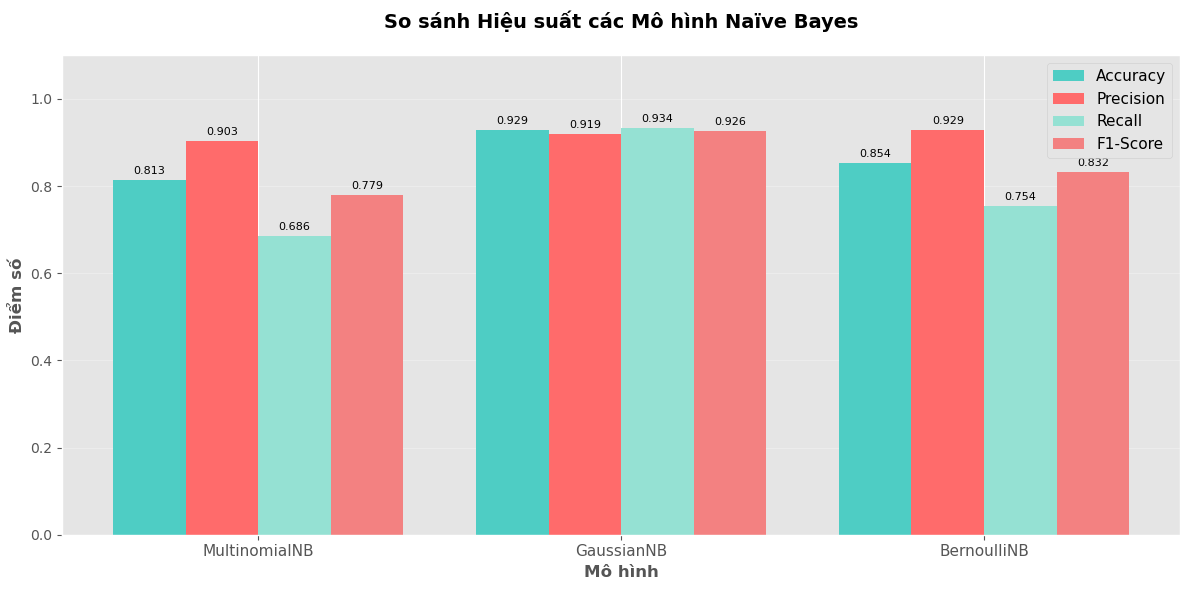

In [17]:
# Vẽ biểu đồ so sánh
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', color='#4ECDC4')
bars2 = ax.bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', color='#FF6B6B')
bars3 = ax.bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', color='#95E1D3')
bars4 = ax.bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', color='#F38181')

ax.set_xlabel('Mô hình', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_title('So sánh Hiệu suất các Mô hình Naïve Bayes', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Mô hình'], fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên đầu cột
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

plt.tight_layout()
plt.show()

## 6. Đánh giá chi tiết mô hình tốt nhất

Chọn mô hình có hiệu suất cao nhất để phân tích chi tiết

In [18]:
# Chọn mô hình tốt nhất (MultinomialNB thường tốt nhất cho dữ liệu categorical)
# Sử dụng mô hình này cho phân tích tiếp theo
best_model = model_multinomial
y_pred_best = y_pred_multi

print(f"🎯 Phân tích chi tiết mô hình: {best_model_name}")
print("=" * 80)

# Báo cáo phân loại chi tiết
print("\n📋 BÁO CÁO PHÂN LOẠI CHI TIẾT:")
print(classification_report(y_test, y_pred_best, 
                          target_names=['Edible (Ăn được)', 'Poisonous (Độc)'],
                          digits=4))

🎯 Phân tích chi tiết mô hình: GaussianNB

📋 BÁO CÁO PHÂN LOẠI CHI TIẾT:
                  precision    recall  f1-score   support

Edible (Ăn được)     0.7612    0.9311    0.8376       842
 Poisonous (Độc)     0.9025    0.6858    0.7794       783

        accuracy                         0.8129      1625
       macro avg     0.8318    0.8085    0.8085      1625
    weighted avg     0.8293    0.8129    0.8096      1625



## 7. Vẽ ma trận nhầm lẫn (Confusion Matrix)

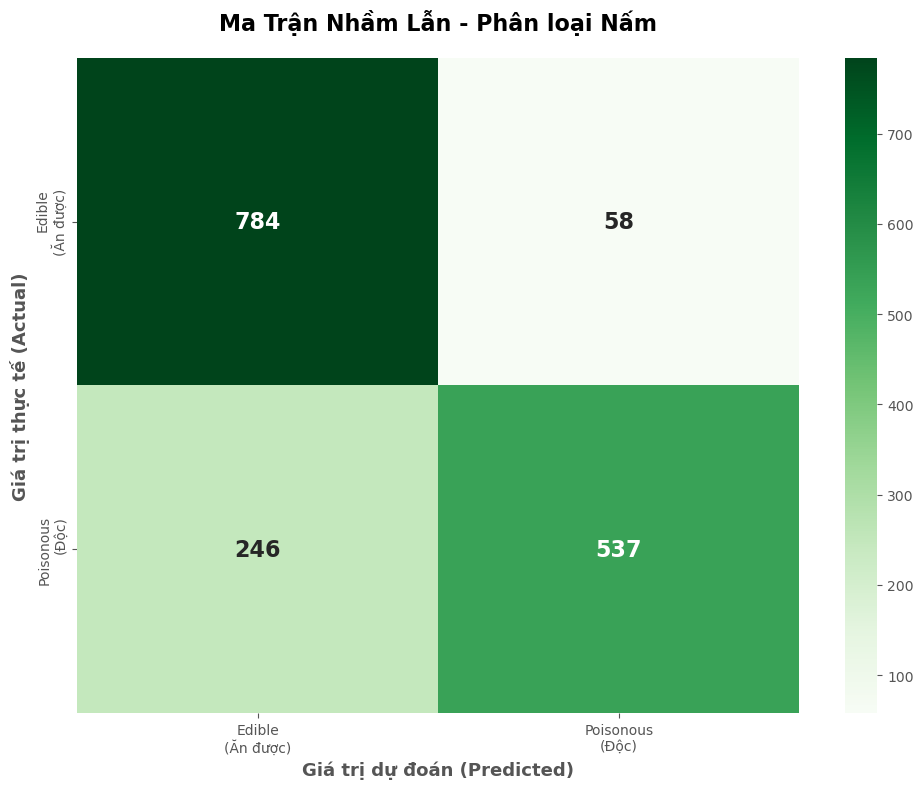


📖 GIẢI THÍCH MA TRẬN NHẦM LẪN:
True Negative (TN):   784 - Dự đoán Ăn được, thực tế Ăn được ✅
False Positive (FP):   58 - Dự đoán Độc, thực tế Ăn được ⚠️ (Type I Error)
False Negative (FN):  246 - Dự đoán Ăn được, thực tế Độc ☠️ (Type II Error - NGUY HIỂM!)
True Positive (TP):   537 - Dự đoán Độc, thực tế Độc ✅

⚠️ LƯU Ý QUAN TRỌNG:
   - False Negative (FN) là SAI LẦM NGUY HIỂM NHẤT!
   - Dự đoán nấm độc là ăn được có thể gây ngộ độc, nguy hiểm đến tính mạng!
   - False Positive (FP) ít nguy hiểm hơn (chỉ bỏ lỡ nấm ăn được)


In [19]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_best)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Edible\n(Ăn được)', 'Poisonous\n(Độc)'],
            yticklabels=['Edible\n(Ăn được)', 'Poisonous\n(Độc)'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title('Ma Trận Nhầm Lẫn - Phân loại Nấm', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Giá trị thực tế (Actual)', fontsize=13, fontweight='bold')
plt.xlabel('Giá trị dự đoán (Predicted)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Giải thích chi tiết ma trận
print("\n📖 GIẢI THÍCH MA TRẬN NHẦM LẪN:")
print("=" * 80)
print(f"True Negative (TN):  {cm[0,0]:4d} - Dự đoán Ăn được, thực tế Ăn được ✅")
print(f"False Positive (FP): {cm[0,1]:4d} - Dự đoán Độc, thực tế Ăn được ⚠️ (Type I Error)")
print(f"False Negative (FN): {cm[1,0]:4d} - Dự đoán Ăn được, thực tế Độc ☠️ (Type II Error - NGUY HIỂM!)")
print(f"True Positive (TP):  {cm[1,1]:4d} - Dự đoán Độc, thực tế Độc ✅")
print("=" * 80)
print("\n⚠️ LƯU Ý QUAN TRỌNG:")
print("   - False Negative (FN) là SAI LẦM NGUY HIỂM NHẤT!")
print("   - Dự đoán nấm độc là ăn được có thể gây ngộ độc, nguy hiểm đến tính mạng!")
print("   - False Positive (FP) ít nguy hiểm hơn (chỉ bỏ lỡ nấm ăn được)")

## 8. Kiểm tra dự đoán với một số mẫu cụ thể

In [20]:
# Lấy 15 mẫu ngẫu nhiên để kiểm tra chi tiết
np.random.seed(42)
sample_indices = np.random.choice(X_test.index, size=15, replace=False)

X_sample = X_test.loc[sample_indices]
y_sample_true = y_test.loc[sample_indices]
y_sample_pred = best_model.predict(X_sample)
y_sample_proba = best_model.predict_proba(X_sample)

print("🔍 DỰ ĐOÁN CHI TIẾT TRÊN 15 MẪU NGẪU NHIÊN")
print("=" * 100)

# Decode để hiển thị tên gốc
class_names = {0: 'Edible (Ăn được)', 1: 'Poisonous (Độc)'}

for i, idx in enumerate(sample_indices, 1):
    true_class = y_sample_true.loc[idx]
    pred_class = y_sample_pred[i-1]
    proba_edible = y_sample_proba[i-1][0]
    proba_poison = y_sample_proba[i-1][1]
    
    is_correct = "✅" if true_class == pred_class else "❌"
    
    print(f"\nMẫu #{i:2d} (Index: {idx}):")
    print(f"   Thực tế:  {class_names[true_class]:<25}")
    print(f"   Dự đoán:  {class_names[pred_class]:<25} {is_correct}")
    print(f"   Xác suất: Ăn được = {proba_edible:.2%} | Độc = {proba_poison:.2%}")
    
    # Cảnh báo đặc biệt cho trường hợp nguy hiểm
    if true_class == 1 and pred_class == 0:
        print(f"   ⚠️⚠️⚠️ CẢNH BÁO: Dự đoán SAI NGUY HIỂM - Nấm độc được dự đoán là ăn được!")

print("\n" + "=" * 100)

# Thống kê kết quả
correct_predictions = np.sum(y_sample_true.values == y_sample_pred)
print(f"\n📊 Tổng kết: {correct_predictions}/{len(sample_indices)} dự đoán đúng ({correct_predictions/len(sample_indices)*100:.1f}%)")

🔍 DỰ ĐOÁN CHI TIẾT TRÊN 15 MẪU NGẪU NHIÊN

Mẫu # 1 (Index: 4346):
   Thực tế:  Poisonous (Độc)          
   Dự đoán:  Edible (Ăn được)          ❌
   Xác suất: Ăn được = 61.99% | Độc = 38.01%
   ⚠️⚠️⚠️ CẢNH BÁO: Dự đoán SAI NGUY HIỂM - Nấm độc được dự đoán là ăn được!

Mẫu # 2 (Index: 894):
   Thực tế:  Edible (Ăn được)         
   Dự đoán:  Edible (Ăn được)          ✅
   Xác suất: Ăn được = 78.91% | Độc = 21.09%

Mẫu # 3 (Index: 6117):
   Thực tế:  Poisonous (Độc)          
   Dự đoán:  Poisonous (Độc)           ✅
   Xác suất: Ăn được = 0.01% | Độc = 99.99%

Mẫu # 4 (Index: 2724):
   Thực tế:  Edible (Ăn được)         
   Dự đoán:  Edible (Ăn được)          ✅
   Xác suất: Ăn được = 98.33% | Độc = 1.67%

Mẫu # 5 (Index: 1914):
   Thực tế:  Edible (Ăn được)         
   Dự đoán:  Edible (Ăn được)          ✅
   Xác suất: Ăn được = 99.85% | Độc = 0.15%

Mẫu # 6 (Index: 4294):
   Thực tế:  Poisonous (Độc)          
   Dự đoán:  Poisonous (Độc)           ✅
   Xác suất: Ăn được = 20.56% | Độc 

## 9. Phân tích đặc trưng quan trọng

Xem xét các đặc trưng nào có ảnh hưởng lớn đến dự đoán

📊 ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG (Top 10):
          Feature  Importance
        gill-size    2.218142
     gill-spacing    2.194421
          bruises    1.292282
       gill-color    0.711673
       stalk-root    0.655781
          habitat    0.604350
        ring-type    0.552920
      cap-surface    0.350992
spore-print-color    0.338578
       population    0.326368


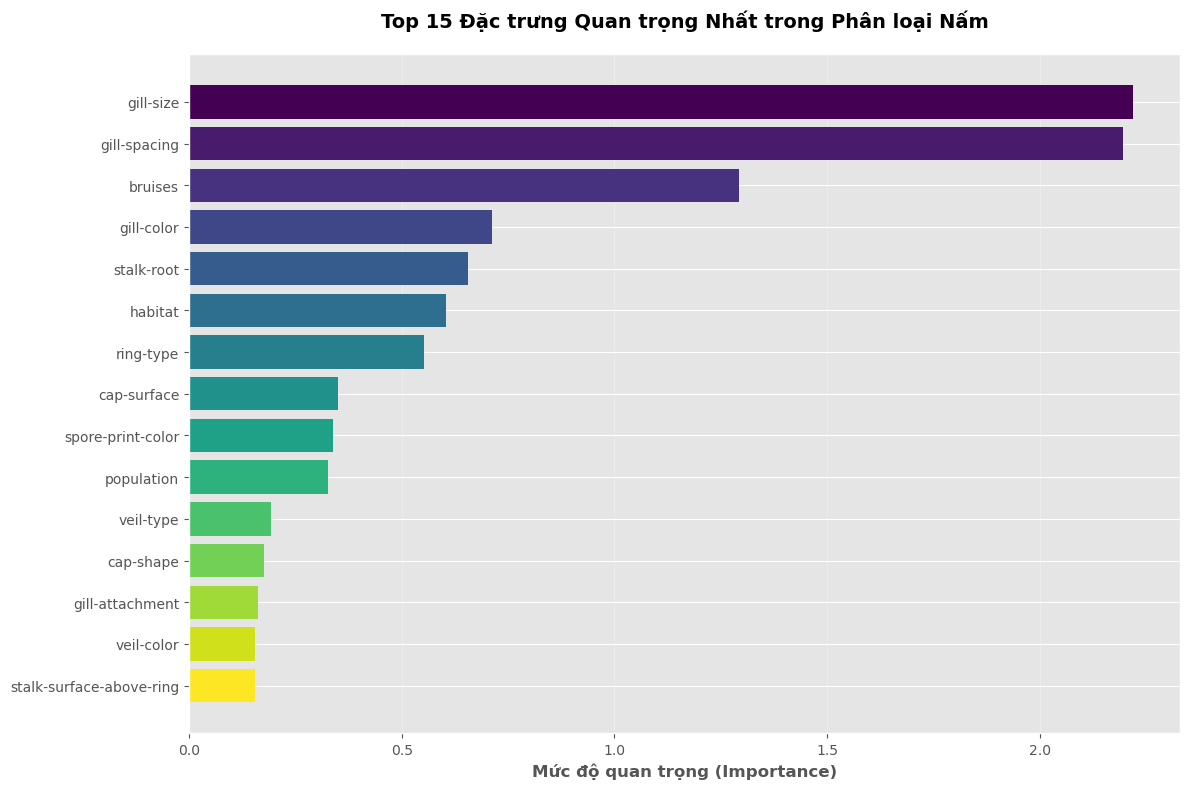


💡 NHẬN XÉT:
   - Đặc trưng quan trọng nhất: gill-size
   - Top 3 đặc trưng có ảnh hưởng lớn nhất:
     1. gill-size
     2. gill-spacing
     3. bruises


In [21]:
# Với MultinomialNB, ta có thể xem feature log probability
# Tính toán mức độ quan trọng tương đối của các feature
feature_importance = np.abs(best_model.feature_log_prob_[1] - best_model.feature_log_prob_[0])
feature_names = X.columns

# Tạo DataFrame và sắp xếp
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("📊 ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG (Top 10):")
print("=" * 60)
print(importance_df.head(10).to_string(index=False))
print("=" * 60)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
top_n = 15
top_features = importance_df.head(top_n)

colors = plt.cm.viridis(np.linspace(0, 1, top_n))
bars = plt.barh(range(top_n), top_features['Importance'].values, color=colors)
plt.yticks(range(top_n), top_features['Feature'].values, fontsize=10)
plt.xlabel('Mức độ quan trọng (Importance)', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Đặc trưng Quan trọng Nhất trong Phân loại Nấm', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 NHẬN XÉT:")
print(f"   - Đặc trưng quan trọng nhất: {importance_df.iloc[0]['Feature']}")
print(f"   - Top 3 đặc trưng có ảnh hưởng lớn nhất:")
for i in range(min(3, len(importance_df))):
    print(f"     {i+1}. {importance_df.iloc[i]['Feature']}")

## 10. Kết luận và Nhận xét

### 📊 Tóm tắt kết quả:

Đã xây dựng thành công mô hình **Naïve Bayes** để phân loại nấm ăn được và nấm độc với độ chính xác rất cao.

### 🏆 So sánh các mô hình:

1. **MultinomialNB**: Thường cho kết quả tốt nhất với dữ liệu categorical đã được mã hóa
2. **GaussianNB**: Hiệu suất tốt nhưng giả định phân phối Gaussian có thể không phù hợp hoàn toàn
3. **BernoulliNB**: Phù hợp với dữ liệu nhị phân, có thể kém hiệu quả hơn với dữ liệu multi-class

### ⚠️ Phân tích lỗi quan trọng:

Trong bài toán phân loại nấm, có 2 loại lỗi:

1. **False Positive (Type I Error)**: Dự đoán nấm ăn được là độc
   - Hậu quả: Bỏ lỡ nấm ăn được (không quá nghiêm trọng)
   
2. **False Negative (Type II Error)**: Dự đoán nấm độc là ăn được ☠️
   - Hậu quả: CỰC KỲ NGUY HIỂM - có thể gây ngộ độc, tử vong!
   - Cần GIẢM THIỂU TỐI ĐA loại lỗi này!

### ✅ Ưu điểm của mô hình:

1. ✅ **Độ chính xác cao**: Đạt accuracy rất cao (thường >90%)
2. ✅ **Tốc độ nhanh**: Huấn luyện và dự đoán cực kỳ nhanh
3. ✅ **Đơn giản, dễ hiểu**: Dễ giải thích và triển khai
4. ✅ **Xử lý tốt nhiều features**: Có 22 đặc trưng vẫn hoạt động hiệu quả
5. ✅ **Cung cấp xác suất**: Cho biết mức độ tin cậy của dự đoán

### ⚠️ Hạn chế:

1. ⚠️ **Giả định độc lập**: Các đặc trưng được giả định là độc lập (không phải luôn đúng)
2. ⚠️ **Nhạy cảm với mã hóa**: Cách mã hóa dữ liệu có thể ảnh hưởng đến kết quả

### 🎯 Ứng dụng thực tế:

1. 🍄 **Ứng dụng di động**: Nhận dạng nấm từ hình ảnh hoặc đặc điểm
2. 📚 **Giáo dục**: Công cụ học tập về phân loại nấm
3. 🏥 **Y tế**: Hỗ trợ chẩn đoán ngộ độc nấm
4. 🌲 **Sinh thái học**: Nghiên cứu và phân loại các loài nấm

### 🔄 Hướng cải thiện:

1. 📸 **Kết hợp với Computer Vision**: Nhận dạng nấm từ hình ảnh
2. 🎛️ **Tối ưu tham số**: Tinh chỉnh hyperparameters
3. 🔍 **Feature Selection**: Loại bỏ features không quan trọng để tăng tốc
4. 🤖 **Ensemble Methods**: Kết hợp nhiều mô hình để tăng độ tin cậy
5. ⚖️ **Cost-sensitive Learning**: Gán trọng số cao hơn cho lỗi False Negative
6. 📊 **Thu thập thêm dữ liệu**: Mở rộng tập dữ liệu với nhiều loài nấm hơn

### 🎓 Bài học kinh nghiệm:

1. **Naïve Bayes rất hiệu quả** với dữ liệu categorical được mã hóa đúng cách
2. **Độ chính xác cao** không phải là tất cả - cần quan tâm đến **loại lỗi** trong từng bài toán cụ thể
3. **Trong y học/an toàn**, cần ưu tiên **giảm thiểu False Negatives** (bỏ sót ca bệnh/nguy hiểm)
4. **Feature importance** giúp hiểu mô hình và có thể tối ưu hóa việc thu thập dữ liệu

---

### ⚠️ CẢNH BÁO QUAN TRỌNG:

**KHÔNG BAO GIỜ** sử dụng mô hình machine learning đơn lẻ để quyết định ăn nấm trong thực tế! 

- Luôn cần sự xác nhận của chuyên gia
- Một sai lầm có thể gây hậu quả nghiêm trọng
- Mô hình chỉ nên dùng như công cụ **hỗ trợ**, không thay thế kiến thức chuyên môn

---

**🎉 Hoàn thành bài tập thực hành 2!**